
# Task
This is the continuation of last weeks exercise.
After having analysed the Titanic Dataset, you should now prepare a machine
learning model to predict whether passengers will survive.
It is entirely up to you which algorithm and feature engineering to use.
I do recommend using some of the algorithms available in sklearn, but if you would 
like to use another library that's also ok. It's a good idea to try and evaluate different algorithms,
and different pre-processing/cleaning/feature-generation options if you have the time.

I have split the training data into a train- and a test-set already. These can be found as separate files 
in the `data`-directory. You should only use the training set throughout your entire development -- feel free 
to use cross-validation or split the training set into a train- and a validation set again.
Once you have developed a final model, you should evaluate this model on the test set I've provided,
and report the MCC score for the test set in the title of your PR. You should **not** evaluate the test
set more than once for this initial submission!
If you decide to change your code after code-review, you can report new values in the comments, but
leave the initial MCC in the title unchanged.

In [131]:
import pandas as pd
import plotnine as p9
import seaborn as sns
import matplotlib
from sklearn import tree, datasets, cluster, manifold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, matthews_corrcoef

titanic_data = pd.read_csv('ppp-2023/data/titanic_train.csv')
titanic_data = titanic_data.drop(["Cabin", "Ticket", "Name", "Embarked", "PassengerId"], axis=1)
titanic_data = titanic_data.fillna({"Age": titanic_data["Age"].mean()})

titanic_data = titanic_data.replace("female", 0)
titanic_data = titanic_data.replace("male", 1)


titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,29.567002,0,0,8.0500
1,1,1,1,51.000000,0,0,26.5500
2,1,3,0,29.567002,1,1,22.3583
3,0,3,1,29.567002,0,0,7.0500
4,1,2,0,29.000000,0,0,10.5000
...,...,...,...,...,...,...,...
752,0,1,1,29.567002,0,0,0.0000
753,0,3,1,30.000000,1,0,16.1000
754,1,1,0,24.000000,0,0,69.3000
755,1,3,0,2.000000,0,1,12.2875


In [132]:
x = titanic_data.iloc[:, 1:]
y = titanic_data[["Survived"]]
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, stratify=y)


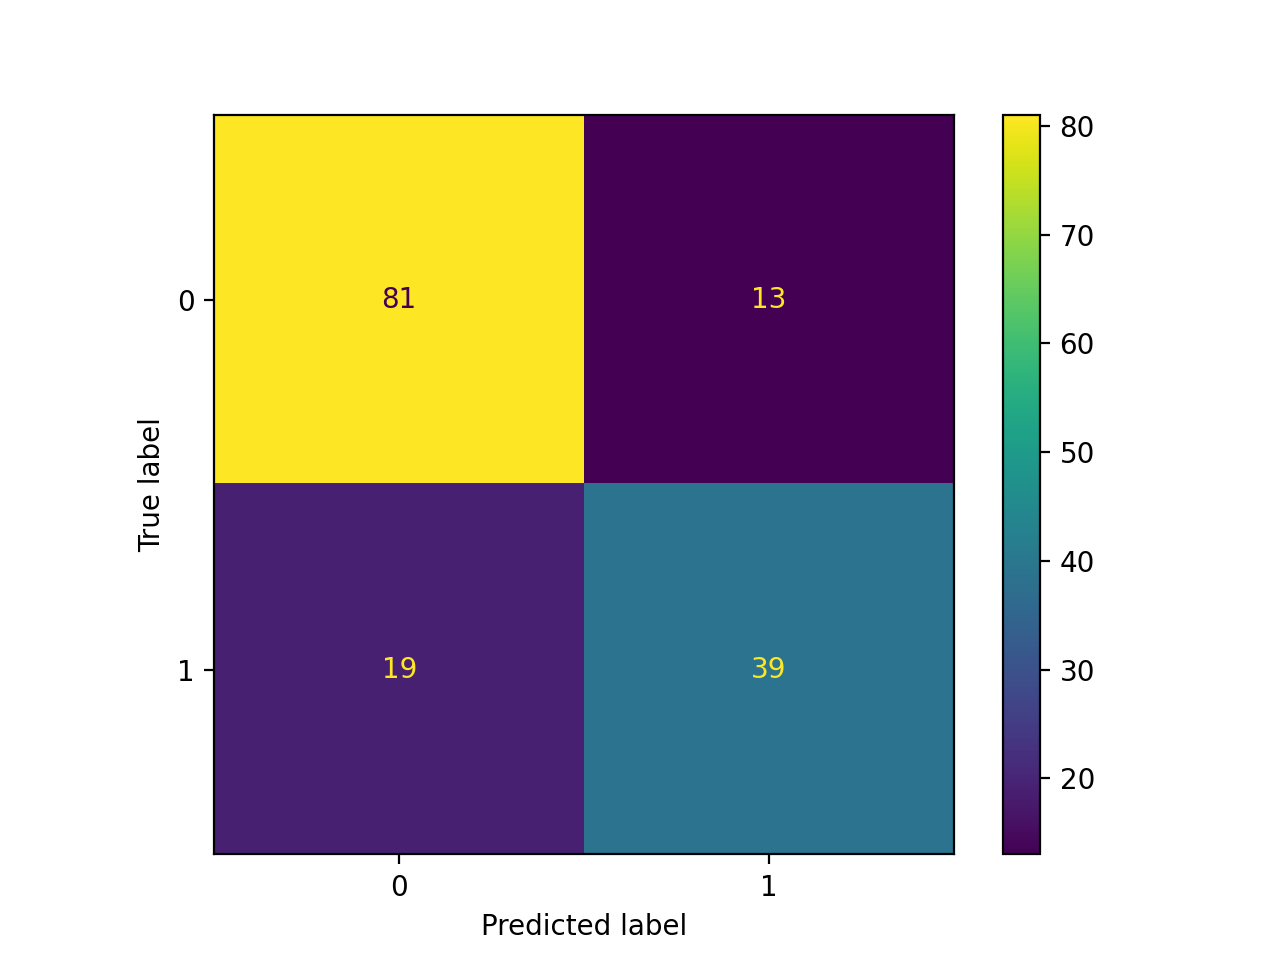

In [133]:

classifier = tree.DecisionTreeClassifier(max_depth=15)
classifier.fit(x_train,y_train)
ConfusionMatrixDisplay.from_estimator(classifier, x_val, y_val)

In [134]:
cross_val_score(classifier, x_val, y_val, cv=10, scoring="matthews_corrcoef")

array([0.46666667, 0.73333333, 0.28867513, 0.57735027, 0.73854895,
       0.44444444, 0.16666667, 0.44444444, 0.8660254 , 0.4       ])

In [135]:
# mean_scores = []
# for depth in [15,17,18,19,22, 30]:
#     print(f'Running cross-validation for {depth=}')
#     classifier = tree.DecisionTreeClassifier(max_depth=depth)
#     scores = cross_val_score(classifier, x_val, y_val, cv=10, scoring='matthews_corrcoef')
#     mean_scores.append((scores.mean(), scores.std()))

In [136]:
#mean_scores

In [137]:
final_classifier = tree.DecisionTreeClassifier(max_depth=18)
final_classifier.fit(x,y)

DecisionTreeClassifier(max_depth=18)

In [138]:
matthews_corrcoef(y_val, classifier.predict(x_val))

0.5469048506159849

In [139]:
titanic_data_test = pd.read_csv('ppp-2023/data/titanic_test.csv')
titanic_data_test = titanic_data_test.drop(["Cabin", "Ticket", "Name", "Embarked", "PassengerId"], axis=1)
titanic_data_test = titanic_data_test.fillna({"Age": titanic_data_test["Age"].mean()})

titanic_data_test = titanic_data_test.replace("female", 0)
titanic_data_test = titanic_data_test.replace("male", 1)
titanic_data_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,25.000000,0,0,0.0000
1,0,3,1,26.000000,1,0,7.8542
2,0,3,1,17.000000,0,0,7.1250
3,0,3,0,30.448598,8,2,69.5500
4,0,3,1,30.448598,0,0,7.8958
...,...,...,...,...,...,...,...
129,0,2,1,18.000000,0,0,73.5000
130,0,1,1,40.000000,0,0,0.0000
131,0,2,1,36.500000,0,2,26.0000
132,1,2,0,19.000000,1,0,26.0000


In [140]:
x_test = titanic_data_test.iloc[:, 1:]
y_test = titanic_data_test[["Survived"]]

In [141]:
matthews_corrcoef(y_test, final_classifier.predict(x_test))

0.5147602096861095

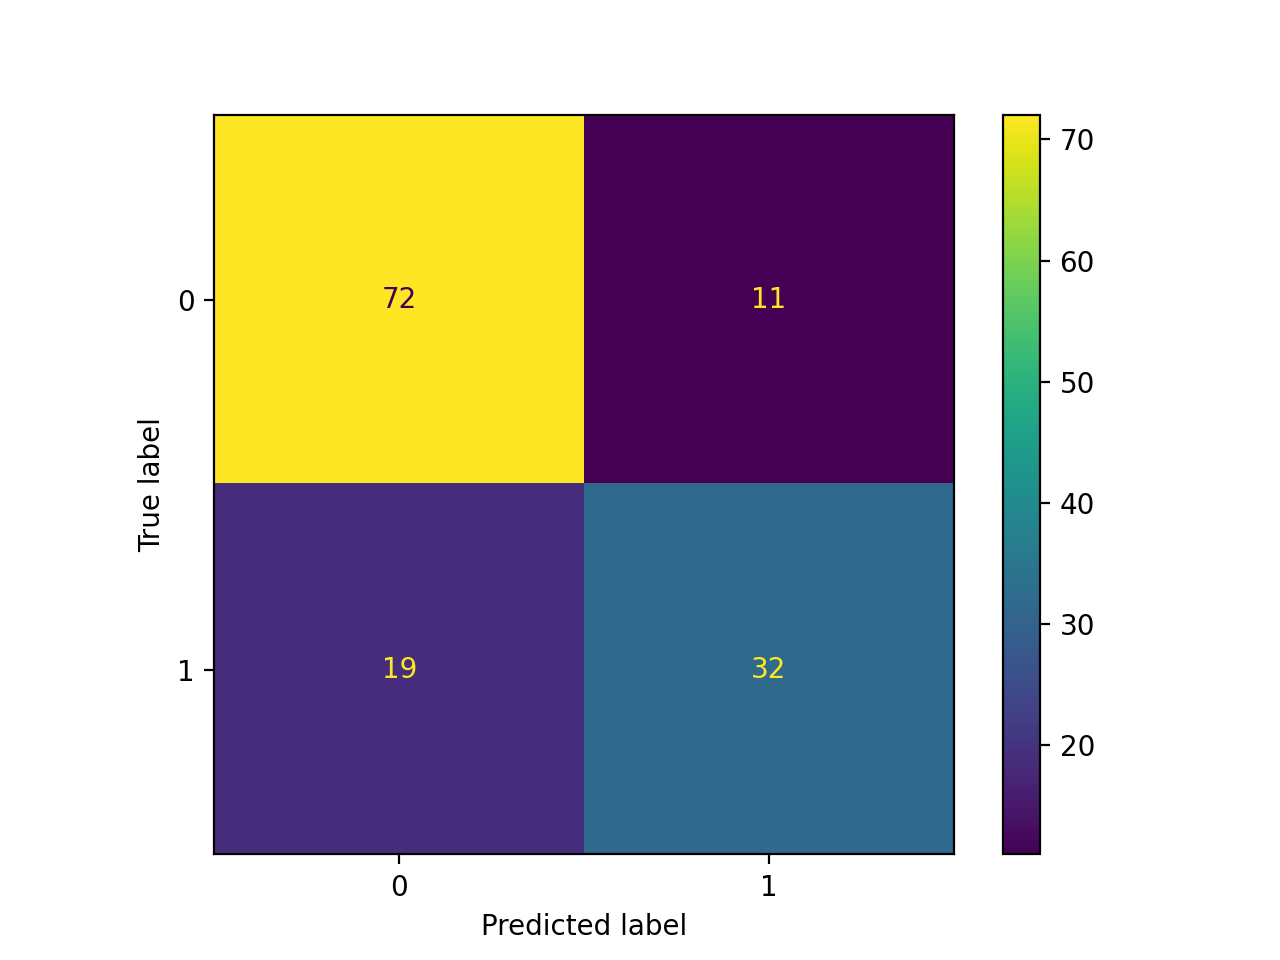

In [142]:
ConfusionMatrixDisplay.from_estimator(final_classifier, x_test, y_test)